In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from keras.models import load_model

pd.set_option('display.max_rows', None)

In [2]:
df1=pd.read_csv("observed_det.csv")
df2=pd.read_csv("observed_over.csv")

In [3]:
df2.name.value_counts()

AKHer            4
ASCrB            4
BHCas            4
HIDra            4
V2612Oph         4
ASSer            3
BXDra            3
GSC 0763-0572    3
V1128Tau         3
V2790Ori         3
YZPho            3
AH Aur           2
BQAri            2
UVLyn            2
V369Mon          2
Name: name, dtype: int64

In [4]:
df1.name.value_counts()

ATPeg       4
BUVul       4
UXHer       4
XZAql       4
IOUMA       3
LLCom       3
V337Aql     3
v773cas     3
WYHya       3
FROri       2
UCrB        2
V1241Tau    2
V548Cyg     2
Y Cam       1
Name: name, dtype: int64

In [5]:
df=df1.append(df2).reset_index()
df

,index,Unnamed: 0,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0,0,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154
1,1,1,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154
2,2,2,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154
3,3,3,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154
4,4,4,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739
5,5,5,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,I,"[0.4472, 0.4461, 0.4455, 0.4454, 0.446, 0.4475...",1.721739
6,6,6,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,R,"[0.4303, 0.4292, 0.4284, 0.4278, 0.4279, 0.429...",1.721739
7,7,7,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,B,"[0.3927, 0.3923, 0.3926, 0.3936, 0.3954, 0.398...",1.721739
8,8,8,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https//iopscience.iop.org/article/10.1088/0004...,FROri,V,"[0.4315, 0.4285, 0.4277, 0.4291, 0.4328, 0.438...",1.708488
9,9,9,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https//iopscience.iop.org/article/10.1088/0004...,FROri,R,"[0.4117, 0.4079, 0.4073, 0.4103, 0.4168, 0.425...",1.708488


In [11]:
df.columns

Index(['index', 'Unnamed: 0', 'q', 'inc', 'omega1', 'omega2', 'T1', 'T2', 'P',
       'Type', 'Spot', 'Ref', 'name', 'filter', 'curve', 't1_t2'],
      dtype='object')

In [6]:
df=df.drop(columns=["index", "Unnamed: 0"])
df.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154
1,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154
2,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154
3,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154
4,0.366,88.7,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739


In [7]:
df.to_csv("observed_new.csv")

In [20]:
f3=open("krivky/FROri.json")
d3=json.load(f3)
x3=d3["system_parameters"] #parametre
df=df.append([x3]*2, ignore_index=True)
df.loc[[8,9],["name"]]="FROri"
df.loc[[8,9],["filter"]]=["V", "R"]
df.at[8,"curve"]=d3["interpolated_light_curves"]["V"]
df.at[9,"curve"]=d3["interpolated_light_curves"]["R"]
f3.close()

In [21]:
f4=open("krivky/IMAur.json")
d4=json.load(f4)
x4=d4["system_parameters"] #parametre
df=df.append([x4]*2, ignore_index=True)
df.loc[[10,11],["name"]]="IMAur"
df.loc[[10,11],["filter"]]=["V", "B", ]
df.at[10,"curve"]=d4["interpolated_light_curves"]["V"]
df.at[11,"curve"]=d4["interpolated_light_curves"]["B"]
f4.close()

In [22]:
f5=open("krivky/IOUMA.json")
d5=json.load(f5)
x5=d5["system_parameters"] #parametre
df=df.append([x5]*3, ignore_index=True)
df.loc[[12,13,14],["name"]]="IOUMA"
df.loc[[12,13,14],["filter"]]=["V", "B", "R"]
df.at[12,"curve"]=d5["interpolated_light_curves"]["V"]
df.at[13,"curve"]=d5["interpolated_light_curves"]["B"]
df.at[14,"curve"]=d5["interpolated_light_curves"]["R"]
f5.close()

In [24]:
f6=open("krivky/LLCom.json")
d6=json.load(f6)
x6=d6["system_parameters"] #parametre
df=df.append([x6]*3, ignore_index=True)
df.loc[[15,16,17],["name"]]="LLCom"
df.loc[[15,16,17],["filter"]]=["V", "R", "B"]
df.at[15,"curve"]=d6["interpolated_light_curves"]["V"]
df.at[16,"curve"]=d6["interpolated_light_curves"]["R"]
df.at[17,"curve"]=d6["interpolated_light_curves"]["B"]
f6.close()

In [25]:
f7=open("krivky/UCrB.json")
d7=json.load(f7)
x7=d7["system_parameters"] #parametre
df=df.append([x7]*2, ignore_index=True)
df.loc[[18,19],["name"]]="UCrB"
df.loc[[18,19],["filter"]]=["V", "B"]
df.at[18,"curve"]=d7["interpolated_light_curves"]["V"]
df.at[19,"curve"]=d7["interpolated_light_curves"]["B"]
f7.close()

In [26]:
f8=open("krivky/UXHer.json")
d8=json.load(f8)
x8=d8["system_parameters"] #parametre
df=df.append([x8]*4, ignore_index=True)
df.loc[[20,21,22,23],["name"]]="UXHer"
df.loc[[20,21,22,23],["filter"]]=["V", "I", "R", "B"]
df.at[20,"curve"]=d8["interpolated_light_curves"]["V"]
df.at[21,"curve"]=d8["interpolated_light_curves"]["I"]
df.at[22,"curve"]=d8["interpolated_light_curves"]["R"]
df.at[23,"curve"]=d8["interpolated_light_curves"]["B"]
f8.close()

In [27]:
f9=open("krivky/V1241Tau.json")
d9=json.load(f9)
x9=d9["system_parameters"] #parametre
df=df.append([x9]*2, ignore_index=True)
df.loc[[24,25],["name"]]="V1241Tau"
df.loc[[24,25],["filter"]]=["V", "B"]
df.at[24,"curve"]=d9["interpolated_light_curves"]["V"]
df.at[25,"curve"]=d9["interpolated_light_curves"]["B"]
f9.close()

In [28]:
f10=open("krivky/V337Aql.json")
d10=json.load(f10)
x10=d10["system_parameters"] #parametre
df=df.append([x10]*3, ignore_index=True)
df.loc[[26,27,28],["name"]]="V337Aql"
df.loc[[26,27,28],["filter"]]=["V", "B", "R"]
df.at[26,"curve"]=d10["interpolated_light_curves"]["V"]
df.at[27,"curve"]=d10["interpolated_light_curves"]["B"]
df.at[28,"curve"]=d10["interpolated_light_curves"]["R"]
f10.close()

In [29]:
f11=open("krivky/V548Cyg.json")
d11=json.load(f11)
x11=d11["system_parameters"] #parametre
df=df.append([x11]*2, ignore_index=True)
df.loc[[29,30],["name"]]="V548Cyg"
df.loc[[29,30],["filter"]]=["V", "B"]
df.at[29,"curve"]=d11["interpolated_light_curves"]["V"]
df.at[30,"curve"]=d11["interpolated_light_curves"]["B"]
f11.close()

In [30]:
f12=open("krivky/v773cas.json")
d12=json.load(f12)
x12=d12["system_parameters"] #parametre
df=df.append([x12]*3, ignore_index=True)
df.loc[[31,32,33],["name"]]="v773cas"
df.loc[[31,32,33],["filter"]]=["V", "B", "R"]
df.at[31,"curve"]=d12["interpolated_light_curves"]["V"]
df.at[32,"curve"]=d12["interpolated_light_curves"]["B"]
df.at[33,"curve"]=d12["interpolated_light_curves"]["R"]
f12.close()

In [31]:
f13=open("krivky/XZAql.json")
d13=json.load(f13)
x13=d13["system_parameters"] #parametre
df=df.append([x13]*4, ignore_index=True)
df.loc[[34,35,36,37],["name"]]="XZAql"
df.loc[[34,35,36,37],["filter"]]=["V", "B", "R", "I"]
df.at[34,"curve"]=d13["interpolated_light_curves"]["V"]
df.at[35,"curve"]=d13["interpolated_light_curves"]["B"]
df.at[36,"curve"]=d13["interpolated_light_curves"]["R"]
df.at[37,"curve"]=d13["interpolated_light_curves"]["I"]
f13.close()

In [32]:
f14=open("krivky/Y Cam.json")
d14=json.load(f14)
x14=d14["system_parameters"] #parametre
df=df.append([x14]*1, ignore_index=True)
df.loc[[38],["name"]]="Y Cam"
df.loc[[38],["filter"]]=["V"]
df.at[38,"curve"]=d14["interpolated_light_curves"]["V"]
f14.close()

In [33]:
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
0,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.0086, 0.0024, 0.0, 0.0027, 0.0104, 0.0223, ..."
1,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.0121, 0.0037, 0.0, 0.0022, 0.0103, 0.0235, ..."
2,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.0081, 0.003, 0.001, 0.0031, 0.0091, 0.0187,..."
3,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.0056, 0.0026, 0.003, 0.007, 0.0146, 0.0254,..."
4,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.01, 0.003, 0.0, 0.0018, 0.0086, 0.0199, 0.0..."
5,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,B,"[0.0013, 0.0, 0.001, 0.0039, 0.0089, 0.0169, 0..."
6,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,I,"[0.0048, 0.0018, 0.0001, 0.0, 0.0017, 0.0058, ..."
7,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,R,"[0.0058, 0.003, 0.0011, 0.0, 0.0006, 0.0044, 0..."
8,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https://iopscience.iop.org/article/10.1088/000...,FROri,V,"[0.0108, 0.0025, 0.0, 0.0038, 0.0138, 0.0295, ..."
9,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https://iopscience.iop.org/article/10.1088/000...,FROri,R,"[0.0123, 0.002, 0.0, 0.0078, 0.0246, 0.0481, 0..."


In [34]:
df.to_csv("observed.csv")

In [35]:
df["t1_t2"]=df.T1/df.T2
df=df[["name", "filter", "Spot", "t1_t2", "inc", "q", "omega1", "curve"]]
df

,name,filter,Spot,t1_t2,inc,q,omega1,curve
0,ATPeg,V,N,1.653154,76.30,0.484,4.200,"[0.0086, 0.0024, 0.0, 0.0027, 0.0104, 0.0223, ..."
1,ATPeg,B,N,1.653154,76.30,0.484,4.200,"[0.0121, 0.0037, 0.0, 0.0022, 0.0103, 0.0235, ..."
2,ATPeg,I,N,1.653154,76.30,0.484,4.200,"[0.0081, 0.003, 0.001, 0.0031, 0.0091, 0.0187,..."
3,ATPeg,R,N,1.653154,76.30,0.484,4.200,"[0.0056, 0.0026, 0.003, 0.007, 0.0146, 0.0254,..."
4,BUVul,V,y,1.721739,88.70,0.366,2.859,"[0.01, 0.003, 0.0, 0.0018, 0.0086, 0.0199, 0.0..."
5,BUVul,B,y,1.721739,88.70,0.366,2.859,"[0.0013, 0.0, 0.001, 0.0039, 0.0089, 0.0169, 0..."
6,BUVul,I,y,1.721739,88.70,0.366,2.859,"[0.0048, 0.0018, 0.0001, 0.0, 0.0017, 0.0058, ..."
7,BUVul,R,y,1.721739,88.70,0.366,2.859,"[0.0058, 0.003, 0.0011, 0.0, 0.0006, 0.0044, 0..."
8,FROri,V,N,1.708488,83.19,0.325,3.249,"[0.0108, 0.0025, 0.0, 0.0038, 0.0138, 0.0295, ..."
9,FROri,R,N,1.708488,83.19,0.325,3.249,"[0.0123, 0.002, 0.0, 0.0078, 0.0246, 0.0481, 0..."


In [36]:
X=[]
for row in df["curve"]:
    X.append(row)
X=np.array(X)

In [37]:
pred_t1t2=m_t1t2.predict(X)
pred_inc=m_inc.predict(X)
pred_mr=m_mr.predict(X)
pred_psp=m_psp.predict(X)

In [38]:
pred_t1t2=np.reshape(pred_t1t2, len(pred_t1t2))
pred_inc=np.reshape(pred_inc, len(pred_inc))
pred_mr=np.reshape(pred_mr, len(pred_mr))
pred_psp=np.reshape(pred_psp, len(pred_psp))

In [39]:
df["t1_t2_predicted"]=pred_t1t2
df["inc_predicted"]=pred_inc
df["q_predicted"]=pred_mr
df["omega1_predicted"]=pred_psp

<ipython-input-39-48c89946a043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["t1_t2_predicted"]=pred_t1t2
<ipython-input-39-48c89946a043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["inc_predicted"]=pred_inc
<ipython-input-39-48c89946a043>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [40]:
df.inc=(df.inc*math.pi)/180.0
df

/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,filter,Spot,t1_t2,inc,q,omega1,curve,t1_t2_predicted,inc_predicted,q_predicted,omega1_predicted
0,ATPeg,V,N,1.653154,1.331686,0.484,4.200,"[0.0086, 0.0024, 0.0, 0.0027, 0.0104, 0.0223, ...",1.952597,1.513127,0.080736,6.254649
1,ATPeg,B,N,1.653154,1.331686,0.484,4.200,"[0.0121, 0.0037, 0.0, 0.0022, 0.0103, 0.0235, ...",1.370442,1.450161,0.453661,6.866759
2,ATPeg,I,N,1.653154,1.331686,0.484,4.200,"[0.0081, 0.003, 0.001, 0.0031, 0.0091, 0.0187,...",1.695753,1.593800,-0.065608,6.839980
3,ATPeg,R,N,1.653154,1.331686,0.484,4.200,"[0.0056, 0.0026, 0.003, 0.007, 0.0146, 0.0254,...",1.879815,1.542052,-0.107743,6.133565
4,BUVul,V,y,1.721739,1.548107,0.366,2.859,"[0.01, 0.003, 0.0, 0.0018, 0.0086, 0.0199, 0.0...",4.884395,1.461418,1.865883,8.165148
5,BUVul,B,y,1.721739,1.548107,0.366,2.859,"[0.0013, 0.0, 0.001, 0.0039, 0.0089, 0.0169, 0...",5.607215,1.531519,0.468860,4.861086
6,BUVul,I,y,1.721739,1.548107,0.366,2.859,"[0.0048, 0.0018, 0.0001, 0.0, 0.0017, 0.0058, ...",3.333975,1.558635,1.037385,4.976871
7,BUVul,R,y,1.721739,1.548107,0.366,2.859,"[0.0058, 0.003, 0.0011, 0.0, 0.0006, 0.0044, 0...",4.396833,1.566963,0.777423,4.976871
8,FROri,V,N,1.708488,1.451939,0.325,3.249,"[0.0108, 0.0025, 0.0, 0.0038, 0.0138, 0.0295, ...",1.659118,1.565232,0.754928,4.595735
9,FROri,R,N,1.708488,1.451939,0.325,3.249,"[0.0123, 0.002, 0.0, 0.0078, 0.0246, 0.0481, 0...",1.937712,1.566962,0.749702,5.380494


In [42]:
spot=df[["name", "Spot"]].drop_duplicates().reset_index()
spot.Spot=spot.Spot.map({"N":"", "Y":"SPOT", "y":"SPOT"})
spot

,index,name,Spot
0,0,ATPeg,
1,4,BUVul,SPOT
2,8,FROri,
3,10,IMAur,
4,12,IOUMA,
5,15,LLCom,SPOT
6,18,UCrB,
7,20,UXHer,
8,24,V1241Tau,
9,26,V337Aql,


In [43]:
true_t1_t2=df[["t1_t2", "name"]].groupby(["name"]).mean()
true_t1_t2

,t1_t2
name,
ATPeg,1.653154
BUVul,1.721739
FROri,1.708488
IMAur,2.156550
IOUMA,1.830986
LLCom,1.244086
UCrB,2.647619
UXHer,1.866905
V1241Tau,1.521298


In [44]:
names=pd.DataFrame(data={"name":true_t1_t2.index})
t1_t2_B=pd.merge(names, df[df["filter"]=="B"][["t1_t2_predicted", "name"]], how="left")
t1_t2_V=pd.merge(names, df[df["filter"]=="V"][["t1_t2_predicted", "name"]], how="left")
t1_t2_R=pd.merge(names, df[df["filter"]=="R"][["t1_t2_predicted", "name"]], how="left")
t1_t2_I=pd.merge(names, df[df["filter"]=="I"][["t1_t2_predicted", "name"]], how="left")

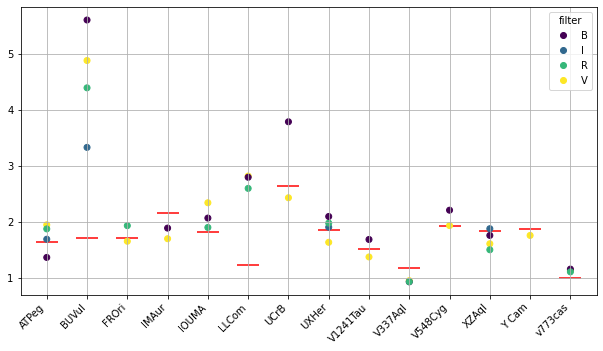

In [45]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
plt.scatter(true_t1_t2.index, true_t1_t2.t1_t2, c="red", marker="_", s=500, label="true t1/t2")
plt.xticks(rotation=45, ha='right')
plt.grid(b="on")
scatter=plt.scatter(df.name, df.t1_t2_predicted, c=df["filter"].astype("category").cat.codes)
plt.legend(handles=scatter.legend_elements()[0], title="filter", labels=["B","I","R","V"])
plt.show()

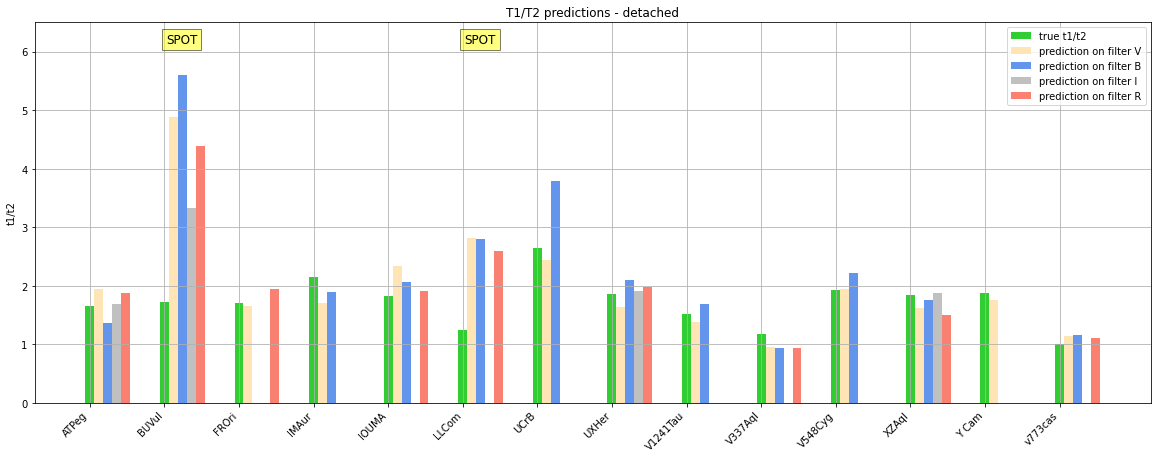

In [72]:
fig, ax = plt.subplots(figsize=(20,7))
barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
r=ax.bar(br1, true_t1_t2.t1_t2, barWidth, label='true t1/t2', color="limegreen")
ax.bar(br2, t1_t2_V.t1_t2_predicted, barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, t1_t2_B.t1_t2_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, t1_t2_I.t1_t2_predicted, barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, t1_t2_R.t1_t2_predicted, barWidth, label='prediction on filter R', color="salmon")
plt.xticks(br1, true_t1_t2.index, rotation=45, ha='right')
ax.scatter(spot.name, [0]*14, c=spot.Spot.astype("category").cat.codes)
plt.title("T1/T2 predictions - detached")
plt.ylabel("t1/t2")
ax.grid(False)
plt.legend(loc="upper right")
plt.grid(b="on")
plt.ylim(top=6.5)
def autolabel(rects):
    n=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 6.1,
                s=spot.Spot[n],
                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
        n=n+1
        
autolabel(r)
plt.show()

In [49]:
true_inc=df[["inc", "name"]].groupby(["name"]).mean()
#true_inc.inc=(true_inc.inc*math.pi)/180.0
inc_B=pd.merge(names, df[df["filter"]=="B"][["inc_predicted", "name"]], how="left")
inc_V=pd.merge(names, df[df["filter"]=="V"][["inc_predicted", "name"]], how="left")
inc_R=pd.merge(names, df[df["filter"]=="R"][["inc_predicted", "name"]], how="left")
inc_I=pd.merge(names, df[df["filter"]=="I"][["inc_predicted", "name"]], how="left")

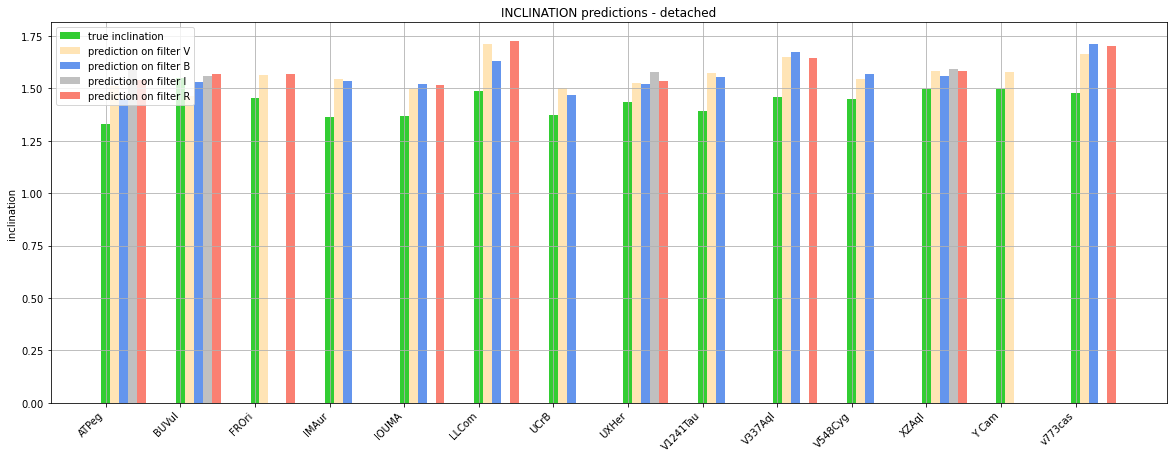

In [63]:
fig, ax = plt.subplots(figsize=(20,7))
barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
r=plt.bar(br1, true_inc.inc, barWidth, label='true inclination', color="limegreen")
plt.bar(br2, inc_V.inc_predicted, barWidth, label='prediction on filter V', color="moccasin")
plt.bar(br3, inc_B.inc_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
plt.bar(br4, inc_I.inc_predicted, barWidth, label='prediction on filter I', color="silver")
plt.bar(br5, inc_R.inc_predicted, barWidth, label='prediction on filter R', color="salmon")
plt.xticks(br1, true_inc.index, rotation=45, ha='right')
plt.title("INCLINATION predictions - detached")
plt.ylabel("inclination")
ax.grid(False)
plt.legend()
plt.grid(b="on")
#def autolabel(rects):
#    n=0
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 1.2,
#                s=spot.Spot[n],
#                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
#        n=n+1
        
#autolabel(r)
plt.show()

In [51]:
true_mr=df[["q", "name"]].groupby(["name"]).mean()
mr_B=pd.merge(names, df[df["filter"]=="B"][["q_predicted", "name"]], how="left")
mr_V=pd.merge(names, df[df["filter"]=="V"][["q_predicted", "name"]], how="left")
mr_R=pd.merge(names, df[df["filter"]=="R"][["q_predicted", "name"]], how="left")
mr_I=pd.merge(names, df[df["filter"]=="I"][["q_predicted", "name"]], how="left")

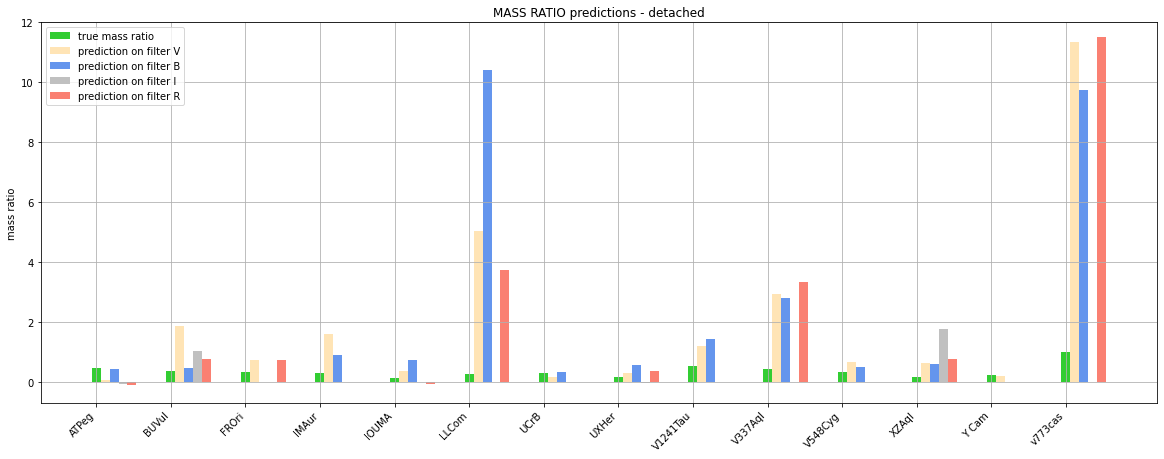

In [66]:
fig, ax = plt.subplots(figsize=(20,7))
barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
r=plt.bar(br1, true_mr.q, barWidth, label='true mass ratio', color="limegreen")
plt.bar(br2, mr_V.q_predicted, barWidth, label='prediction on filter V', color="moccasin")
plt.bar(br3, mr_B.q_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
plt.bar(br4, mr_I.q_predicted, barWidth, label='prediction on filter I', color="silver")
plt.bar(br5, mr_R.q_predicted, barWidth, label='prediction on filter R', color="salmon")
plt.xticks(br1, true_mr.index, rotation=45, ha='right')
plt.title("MASS RATIO predictions - detached")
plt.ylabel("mass ratio")
ax.grid(False)
plt.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(b="on")
plt.ylim(top=12)
#def autolabel(rects):
#    n=0
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 9.2,
#                s=spot.Spot[n],
#                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
#        n=n+1
        
#autolabel(r)
plt.show()

In [53]:
true_psp=df[["omega1", "name"]].groupby(["name"]).mean()
psp_B=pd.merge(names, df[df["filter"]=="B"][["omega1_predicted", "name"]], how="left")
psp_V=pd.merge(names, df[df["filter"]=="V"][["omega1_predicted", "name"]], how="left")
psp_R=pd.merge(names, df[df["filter"]=="R"][["omega1_predicted", "name"]], how="left")
psp_I=pd.merge(names, df[df["filter"]=="I"][["omega1_predicted", "name"]], how="left")

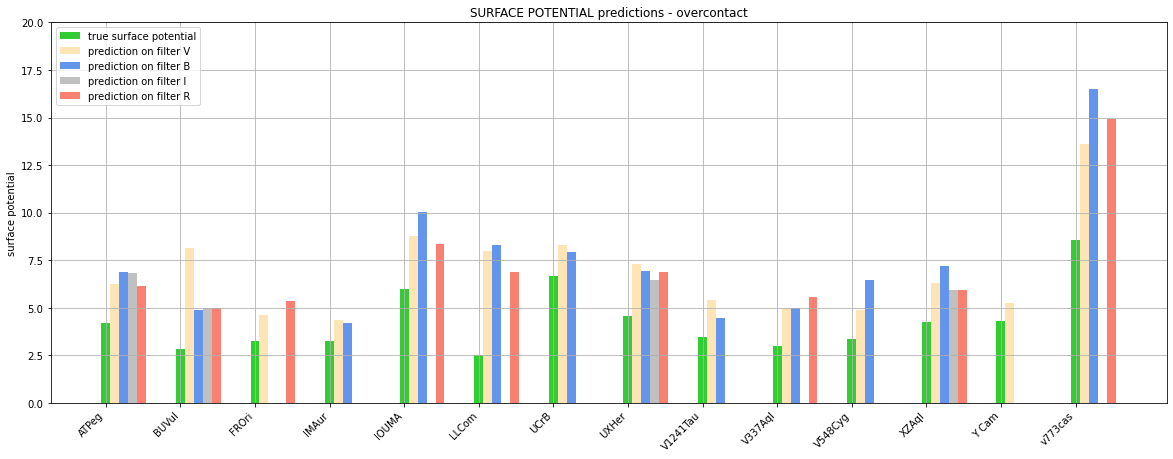

In [55]:
fig, ax = plt.subplots(figsize=(20,7))
barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
r=plt.bar(br1, true_psp.omega1, barWidth, label='true surface potential', color="limegreen")
plt.bar(br2, psp_V.omega1_predicted, barWidth, label='prediction on filter V', color="moccasin")
plt.bar(br3, psp_B.omega1_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
plt.bar(br4, psp_I.omega1_predicted, barWidth, label='prediction on filter I', color="silver")
plt.bar(br5, psp_R.omega1_predicted, barWidth, label='prediction on filter R', color="salmon")
plt.xticks(br1, true_mr.index, rotation=45, ha='right')
plt.title("SURFACE POTENTIAL predictions - overcontact")
plt.ylabel("surface potential")
ax.grid(False)
plt.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(b="on")
plt.ylim(top=20)
#def autolabel(rects):
#    n=0
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , 13,
#                s=spot.Spot[n],
#                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
#        n=n+1
        
#autolabel(r)
plt.show()

In [56]:
def plot_curves(name):
    name_c=df[df["name"]==name]["name"].count()
    curves=df[df["name"]==name][["filter", "curve"]].reset_index()
    for i in range(name_c):
        plt.plot(curves.curve[i], label=curves["filter"][i])
    plt.legend(title="filter")
    plt.title(name)
    plt.show()

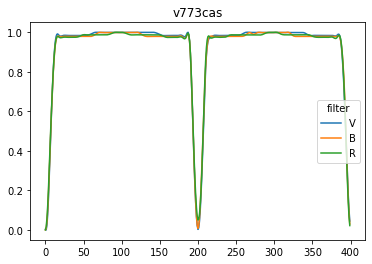

In [61]:
plot_curves("v773cas")

In [78]:
X

array([[2.100e-02, 2.240e-02, 2.390e-02, ..., 1.270e-02, 1.630e-02,
        1.870e-02],
       [1.640e-02, 1.230e-02, 8.200e-03, ..., 2.950e-02, 2.480e-02,
        2.080e-02],
       [9.730e-02, 8.310e-02, 7.000e-02, ..., 1.472e-01, 1.293e-01,
        1.127e-01],
       ...,
       [4.700e-03, 4.100e-03, 3.100e-03, ..., 4.200e-03, 4.700e-03,
        5.100e-03],
       [1.000e-04, 1.300e-03, 3.600e-03, ..., 3.300e-03, 1.700e-03,
        7.000e-04],
       [2.860e-02, 2.640e-02, 2.260e-02, ..., 3.080e-02, 2.950e-02,
        2.810e-02]])

In [82]:
type(df.curve[0][0])

float

In [105]:
df[df["name"]=="AKHer"][["name", "t1_t2", "inc", "q", "omega1"]].rename(columns={"t1_t2":"t1/t2", "inc":"inclination", "q":"mass ratio", "omega1": "surface potential"})

,name,t1/t2,inclination,mass ratio,surface potential
2,AKHer,1.05178,81.7,0.27,2.357
3,AKHer,1.05178,81.7,0.27,2.357
4,AKHer,1.05178,81.7,0.27,2.357
5,AKHer,1.05178,81.7,0.27,2.357
